# Quantium Virtual Internship - Retail Strategy and Analytics - Task 2

**Evaluation of the performances between the control and trial stores**

The dataset is uploaded and required libraries are imported

In [1846]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, t
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [1847]:
qvi_data=pd.read_csv("/quantium_forage_project/QVI_data.csv")
qvi_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


### Select control stores

Since the trial stores i.e 77, 86 and 88 are already determined, the control stores should be selected for the entire observation period. The control stores prior to the trial period could be determined by examining the similarities between the stores. The monthly sales, monthly number of customers and monthly number of transactions per customer are calculated. 

New month ID column in the data is added

In [1848]:
#Add a new month ID column in the data with the format yyyymm

qvi_data['months']=pd.to_datetime(qvi_data['DATE']).dt.to_period('M')
qvi_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,months
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11


For each store and months, the total sales, number of customers,transactions per customer, chips per 
customer and the average price per unit are calculated. 

In [1849]:
sales_mon=pd.pivot_table(qvi_data, index=['STORE_NBR','months'], values=['TOT_SALES','LYLTY_CARD_NBR'],
                           aggfunc={'TOT_SALES':['sum','count'],
                                    'LYLTY_CARD_NBR':'nunique'})
sales_mon.head(10)

LYLTY_CARD_NBR TOT_SALES       
                         nunique     count    sum
STORE_NBR months                                 
1         2018-07             49        52  206.9
          2018-08             42        43  176.1
          2018-09             59        62  278.8
          2018-10             44        45  188.1
          2018-11             46        47  192.6
          2018-12             42        47  189.6
          2019-01             35        36  154.8
          2019-02             52        55  225.4
          2019-03             45        49  192.9
          2019-04             42        43  192.9

In [1850]:
#renaming columns and adjusting dataframe
sales_mon=sales_mon.rename(columns={"nunique":"nCustomers","count":"tot_nmbr_tran","sum":"tot_sales"})
sales_mon.columns = sales_mon.columns.droplevel(0)
sales_mon.head()

nCustomers  tot_nmbr_tran  tot_sales
STORE_NBR months                                       
1         2018-07          49             52      206.9
          2018-08          42             43      176.1
          2018-09          59             62      278.8
          2018-10          44             45      188.1
          2018-11          46             47      192.6

In [1851]:
#Calculating number of customers and average price per unit
sales_mon['nTxnPerCust']=sales_mon['tot_nmbr_tran']/sales_mon['nCustomers']
sales_mon['avgPricePerUnit']=sales_mon['tot_sales']/sales_mon['nCustomers']
sales_mon.head()

nCustomers  tot_nmbr_tran  tot_sales  nTxnPerCust  \
STORE_NBR months                                                       
1         2018-07          49             52      206.9     1.061224   
          2018-08          42             43      176.1     1.023810   
          2018-09          59             62      278.8     1.050847   
          2018-10          44             45      188.1     1.022727   
          2018-11          46             47      192.6     1.021739   

                   avgPricePerUnit  
STORE_NBR months                    
1         2018-07         4.222449  
          2018-08         4.192857  
          2018-09         4.725424  
          2018-10         4.275000  
          2018-11         4.186957

In [1852]:
#new dataframe for calculating chips per customer
chpsPercust=pd.pivot_table(qvi_data, index=['STORE_NBR','months'], values=['PROD_QTY'],
                           aggfunc=np.sum)
chpsPercust=chpsPercust.rename(columns={"PROD_QTY":"tot_qty"})
chpsPercust.head(10)

tot_qty
STORE_NBR months          
1         2018-07       62
          2018-08       54
          2018-09       75
          2018-10       58
          2018-11       57
          2018-12       57
          2019-01       42
          2019-02       65
          2019-03       58
          2019-04       57

In [1853]:
#adjusting dataframe and calculation of chips per customer
measureOverTime = pd.concat([sales_mon,chpsPercust], sort=False, axis=1)
measureOverTime['nChpsPerCust']=measureOverTime['tot_qty']/measureOverTime['nCustomers']
measureOverTime.head()

nCustomers  tot_nmbr_tran  tot_sales  nTxnPerCust  \
STORE_NBR months                                                       
1         2018-07          49             52      206.9     1.061224   
          2018-08          42             43      176.1     1.023810   
          2018-09          59             62      278.8     1.050847   
          2018-10          44             45      188.1     1.022727   
          2018-11          46             47      192.6     1.021739   

                   avgPricePerUnit  tot_qty  nChpsPerCust  
STORE_NBR months                                           
1         2018-07         4.222449       62      1.265306  
          2018-08         4.192857       54      1.285714  
          2018-09         4.725424       75      1.271186  
          2018-10         4.275000       58      1.318182  
          2018-11         4.186957       57      1.239130

In [1854]:
measureOverTime=measureOverTime.reset_index()
measureOverTime.head()

,STORE_NBR,months,nCustomers,tot_nmbr_tran,tot_sales,nTxnPerCust,avgPricePerUnit,tot_qty,nChpsPerCust
0,1,2018-07,49,52,206.9,1.061224,4.222449,62,1.265306
1,1,2018-08,42,43,176.1,1.023810,4.192857,54,1.285714
2,1,2018-09,59,62,278.8,1.050847,4.725424,75,1.271186
3,1,2018-10,44,45,188.1,1.022727,4.275000,58,1.318182
4,1,2018-11,46,47,192.6,1.021739,4.186957,57,1.239130


The stores with full observation period and pre-trial period are filtered. 

In [1855]:
#filter the stores with full observation period

obsvPerStore = measureOverTime.groupby('STORE_NBR', as_index = False).months.count() 
store_nbr = obsvPerStore[obsvPerStore.months == 12].STORE_NBR.array #full observtion period
measuresOverTime = measureOverTime[measureOverTime.STORE_NBR.isin(store_nbr)]
preTrialMeasures =  measureOverTime[measureOverTime.months < '2019-02'] #pretrial period
preTrialMeasures.head()

,STORE_NBR,months,nCustomers,tot_nmbr_tran,tot_sales,nTxnPerCust,avgPricePerUnit,tot_qty,nChpsPerCust
0,1,2018-07,49,52,206.9,1.061224,4.222449,62,1.265306
1,1,2018-08,42,43,176.1,1.023810,4.192857,54,1.285714
2,1,2018-09,59,62,278.8,1.050847,4.725424,75,1.271186
3,1,2018-10,44,45,188.1,1.022727,4.275000,58,1.318182
4,1,2018-11,46,47,192.6,1.021739,4.186957,57,1.239130


In [1856]:
preTrialMeasures['months'] = preTrialMeasures['months'].astype(str)

In [1857]:
preTrialMeasures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 0 to 3163
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STORE_NBR        1848 non-null   int64  
 1   months           1848 non-null   object 
 2   nCustomers       1848 non-null   int64  
 3   tot_nmbr_tran    1848 non-null   int64  
 4   tot_sales        1848 non-null   float64
 5   nTxnPerCust      1848 non-null   float64
 6   avgPricePerUnit  1848 non-null   float64
 7   tot_qty          1848 non-null   int64  
 8   nChpsPerCust     1848 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 144.4+ KB


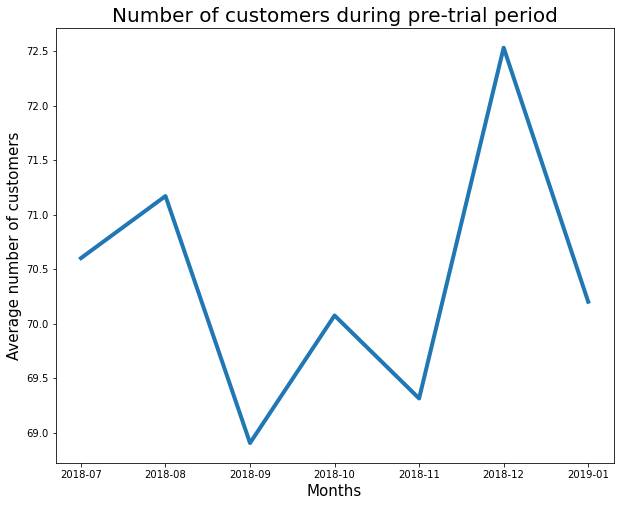

In [1858]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(data=preTrialMeasures, x='months',y="nCustomers", ci=None, lw=4)

# Set title and labels for axes
plt.xlabel("Months", fontsize=15)
plt.ylabel("Average number of customers", fontsize=15)
plt.title('Number of customers during pre-trial period', fontsize=20)

#plt.xticks(rotation=90)
#plt.xticks(trannum['Date'])
plt.show()

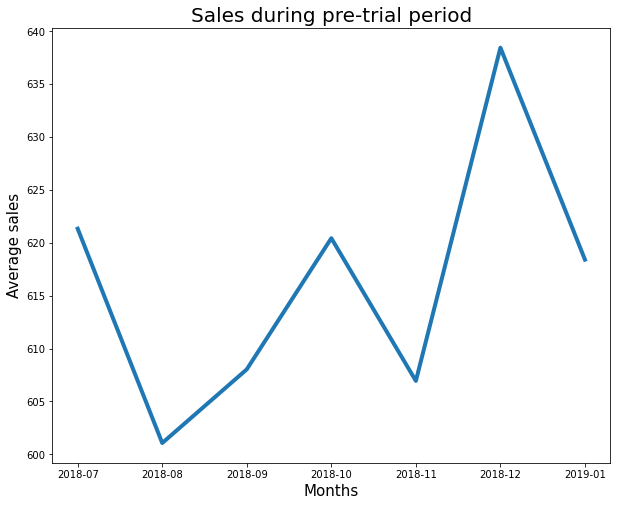

In [1859]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(data=preTrialMeasures, x='months',y="tot_sales", ci=None, lw=4)

# Set title and labels for axes
plt.xlabel("Months", fontsize=15)
plt.ylabel("Average sales", fontsize=15)
plt.title('Sales during pre-trial period', fontsize=20)

#plt.xticks(rotation=90)
#plt.xticks(trannum['Date'])
plt.show()

In [1860]:
preTrialMeasures.months.unique()

array(['2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01'], dtype=object)

In [1861]:
trial_str_nmbr = [77, 86, 88]
storeComp = measuresOverTime.STORE_NBR.unique().tolist()

Function to calculate correlation is created. 

In [1862]:
#### Create a function to calculate correlation for a measure,
#### looping through each control store
def calc_corr( measure):
    corrTable = pd.DataFrame( columns = ['Trial Store','Comparison Store', 'Measure', 'Correlation'])
    for i in trial_str_nmbr:
        trial_str_measure = preTrialMeasures.loc[ preTrialMeasures.STORE_NBR == i, measure]
        for j in storeComp:
            storeComparison_measure = preTrialMeasures.loc[ preTrialMeasures.STORE_NBR == j, measure]
            corr = np.corrcoef(trial_str_measure, storeComparison_measure)[0][1]
            corrTable = corrTable.append({
                'Trial Store': i, 
                'Comparison Store': j, 
                'Measure': measure, 
                'Correlation': corr}, ignore_index=True)
    return corrTable

Correlation between trial stores and comparison stores in terms of total sales

In [1863]:
#correlation between trial stores and comparison stores in terms of total sales

corrTable_totSales = calc_corr( 'tot_sales')
corrTable_totSales.head()

,Trial Store,Comparison Store,Measure,Correlation
0,77,1,tot_sales,0.075218
1,77,2,tot_sales,-0.263079
2,77,3,tot_sales,0.806644
3,77,4,tot_sales,-0.263300
4,77,5,tot_sales,-0.110652


Correlation between trial stores and comparison stores in terms of number of customers per month

In [1864]:
#correlation between trial stores and comparison stores in terms of number of customers per month

corrTable_nCustomers = calc_corr( 'nCustomers')
corrTable_nCustomers

,Trial Store,Comparison Store,Measure,Correlation
0,77,1,nCustomers,0.322168
1,77,2,nCustomers,-0.572051
2,77,3,nCustomers,0.834207
3,77,4,nCustomers,-0.295639
4,77,5,nCustomers,0.370659
...,...,...,...,...
775,88,268,nCustomers,0.672672
776,88,269,nCustomers,-0.274781
777,88,270,nCustomers,-0.103032
778,88,271,nCustomers,-0.018831


In [1865]:
corr_scores=pd.concat([corrTable_totSales, corrTable_nCustomers])
corr_scores

,Trial Store,Comparison Store,Measure,Correlation
0,77,1,tot_sales,0.075218
1,77,2,tot_sales,-0.263079
2,77,3,tot_sales,0.806644
3,77,4,tot_sales,-0.263300
4,77,5,tot_sales,-0.110652
...,...,...,...,...
775,88,268,nCustomers,0.672672
776,88,269,nCustomers,-0.274781
777,88,270,nCustomers,-0.103032
778,88,271,nCustomers,-0.018831


Tables with measures 'nCustomers' and 'tot_sales' are merged showing correlation. The table is sorted based on correlation between trial stores and comparison stores. 

In [1866]:
#merge those two tables with metrics; correlation

corr_scores=pd.concat([corrTable_totSales, corrTable_nCustomers])
corr_scores=corr_scores.drop_duplicates()
corr_scores=pd.pivot_table(corr_scores, index=['Trial Store', 'Comparison Store'], values=['Correlation'])
corr_scores=corr_scores.sort_values(ascending=False, by='Correlation')
corr_scores=corr_scores.drop(corr_scores.head(3).index)
corr_scores=corr_scores.reset_index()
corr_scores

,Trial Store,Comparison Store,Correlation
0,77,233,0.947066
1,77,119,0.925466
2,86,155,0.910379
3,88,178,0.835661
4,77,71,0.834461
...,...,...,...
772,86,185,-0.759336
773,86,108,-0.768829
774,88,133,-0.785417
775,86,120,-0.843895


In [1867]:
corr_scores.shape

(777, 3)

Which store is similar to trial store? Store 233 is highly correlated with trial store 77.

In [1868]:
#Store number similar to trial store 77

compstore_like77=corr_scores[(corr_scores['Trial Store']==77)]
compstore_like77=compstore_like77.sort_values(ascending=False, by='Correlation')
compstore_like77.head(3)

,Trial Store,Comparison Store,Correlation
0,77,233,0.947066
1,77,119,0.925466
4,77,71,0.834461


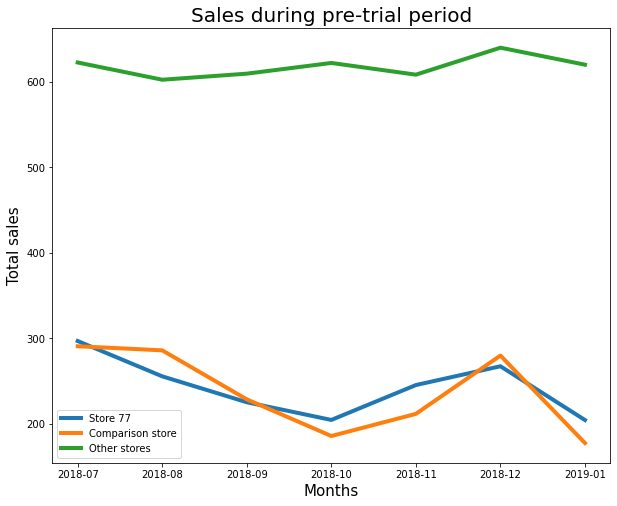

In [1869]:
preTrialMeasures_store77 = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 77]
preTrialMeasures_store233 = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 233]
preTrialMeasures_otherstores = preTrialMeasures[preTrialMeasures['STORE_NBR']!= 77]

fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(x = 'months', y = 'tot_sales' , data = preTrialMeasures_store77, lw=4)
sns.lineplot(x = 'months', y = 'tot_sales' , data = preTrialMeasures_store233, lw=4)
sns.lineplot(x = 'months', y = 'tot_sales' , data = preTrialMeasures_otherstores, ci=None, lw=4)

# Set title and labels for axes
plt.xlabel("Months", fontsize=15)
plt.ylabel("Total sales", fontsize=15)
plt.title('Sales during pre-trial period', fontsize=20)
ax.legend(['Store 77', 'Comparison store', 'Other stores'])
plt.show()

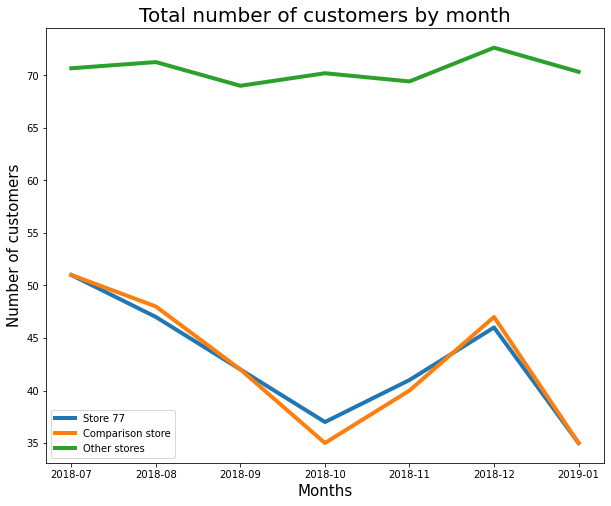

In [1870]:
preTrialMeasures_store77 = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 77]
preTrialMeasures_store233 = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 233]
preTrialMeasures_otherstores = preTrialMeasures[preTrialMeasures['STORE_NBR']!= 77]

fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(x = 'months', y = 'nCustomers' , data = preTrialMeasures_store77, lw=4)
sns.lineplot(x = 'months', y = 'nCustomers' , data = preTrialMeasures_store233, lw=4)
sns.lineplot(x = 'months', y = 'nCustomers' , data = preTrialMeasures_otherstores, ci=None, lw=4)

# Set title and labels for axes
plt.xlabel("Months", fontsize=15)
plt.ylabel("Number of customers", fontsize=15)
plt.title('Total number of customers by month', fontsize=20)
ax.legend(['Store 77', 'Comparison store', 'Other stores'])
plt.show()

Which store is similar to trial store? Store 155 is highly correlated with trial store 86.

In [1871]:
#Store number similar to trial store 86

compstore_like86=corr_scores[(corr_scores['Trial Store']==86)]
compstore_like86=compstore_like86.sort_values(ascending=False, by='Correlation')
compstore_like86.head(3)

,Trial Store,Comparison Store,Correlation
2,86,155,0.910379
9,86,114,0.794877
10,86,260,0.783426


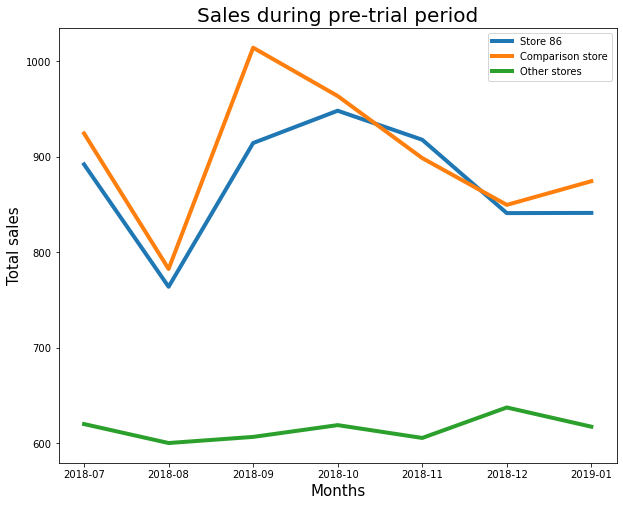

In [1872]:
preTrialMeasures_store86 = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 86]
preTrialMeasures_store155 = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 155]
preTrialMeasures_otherstores = preTrialMeasures[preTrialMeasures['STORE_NBR']!= 86]

fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(x = 'months', y = 'tot_sales' , data = preTrialMeasures_store86, lw=4)
sns.lineplot(x = 'months', y = 'tot_sales' , data = preTrialMeasures_store155, lw=4)
sns.lineplot(x = 'months', y = 'tot_sales' , data = preTrialMeasures_otherstores, ci=None, lw=4)

# Set title and labels for axes
plt.xlabel("Months", fontsize=15)
plt.ylabel("Total sales", fontsize=15)
plt.title('Sales during pre-trial period', fontsize=20)
ax.legend(['Store 86', 'Comparison store', 'Other stores'])
plt.show()

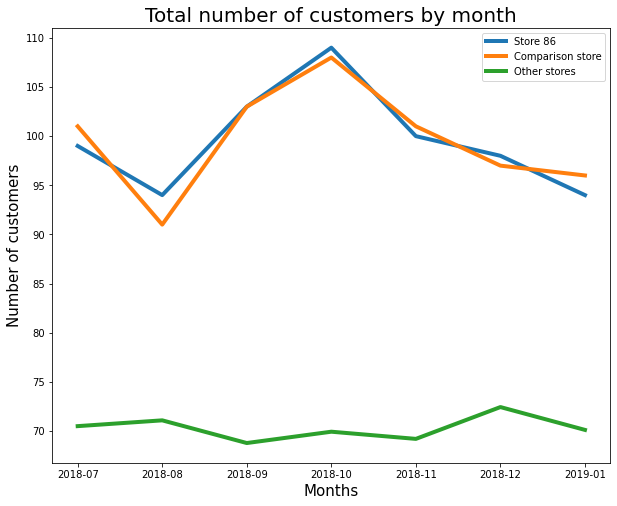

In [1873]:
preTrialMeasures_store86 = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 86]
preTrialMeasures_store155 = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 155]
preTrialMeasures_otherstores = preTrialMeasures[preTrialMeasures['STORE_NBR']!= 86]

fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(x = 'months', y = 'nCustomers' , data = preTrialMeasures_store86, lw=4)
sns.lineplot(x = 'months', y = 'nCustomers' , data = preTrialMeasures_store155, lw=4)
sns.lineplot(x = 'months', y = 'nCustomers' , data = preTrialMeasures_otherstores, ci=None, lw=4)

# Set title and labels for axes
plt.xlabel("Months", fontsize=15)
plt.ylabel("Number of customers", fontsize=15)
plt.title('Total number of customers by month', fontsize=20)
ax.legend(['Store 86', 'Comparison store', 'Other stores'])
plt.show()

Which store is similar to trial store? Store 178 is highly correlated with trial store 88.

In [1874]:
#Store number similar to trial store 88

compstore_like88=corr_scores[(corr_scores['Trial Store']==88)]
compstore_like88=compstore_like88.sort_values(ascending=False, by='Correlation')
compstore_like88.head(3)

,Trial Store,Comparison Store,Correlation
3,88,178,0.835661
5,88,14,0.820767
16,88,204,0.718018


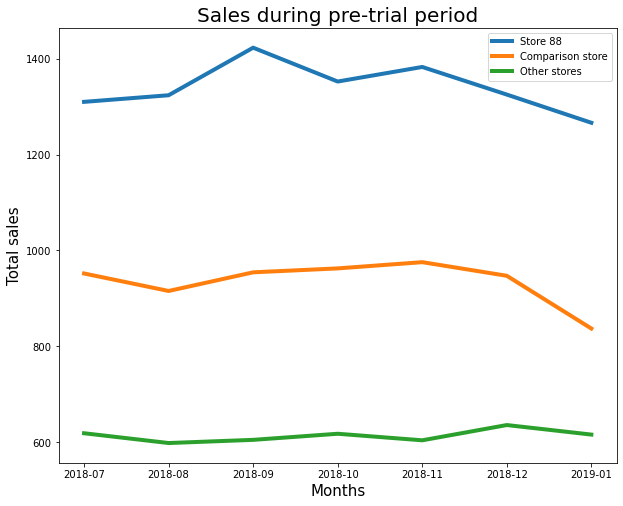

In [1875]:
preTrialMeasures_store88 = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 88]
preTrialMeasures_store178 = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 178]
preTrialMeasures_otherstores = preTrialMeasures[preTrialMeasures['STORE_NBR']!= 88]

fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(x = 'months', y = 'tot_sales' , data = preTrialMeasures_store88, lw=4)
sns.lineplot(x = 'months', y = 'tot_sales' , data = preTrialMeasures_store178, lw=4)
sns.lineplot(x = 'months', y = 'tot_sales' , data = preTrialMeasures_otherstores, ci=None, lw=4)

# Set title and labels for axes
plt.xlabel("Months", fontsize=15)
plt.ylabel("Total sales", fontsize=15)
plt.title('Sales during pre-trial period', fontsize=20)
ax.legend(['Store 88', 'Comparison store', 'Other stores'])
plt.show()

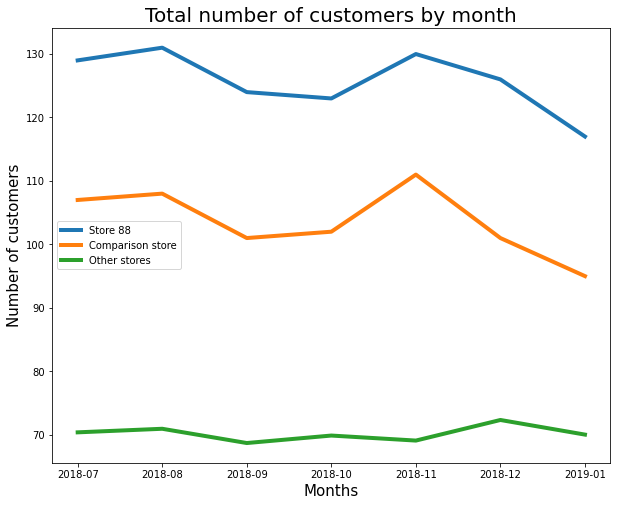

In [1876]:
preTrialMeasures_store88 = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 88]
preTrialMeasures_store178 = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 178]
preTrialMeasures_otherstores = preTrialMeasures[preTrialMeasures['STORE_NBR']!= 88]

fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(x = 'months', y = 'nCustomers' , data = preTrialMeasures_store88, lw=4)
sns.lineplot(x = 'months', y = 'nCustomers' , data = preTrialMeasures_store178, lw=4)
sns.lineplot(x = 'months', y = 'nCustomers' , data = preTrialMeasures_otherstores, ci=None, lw=4)

# Set title and labels for axes
plt.xlabel("Months", fontsize=15)
plt.ylabel("Number of customers", fontsize=15)
plt.title('Total number of customers by month', fontsize=20)
ax.legend(['Store 88', 'Comparison store', 'Other stores'])
plt.show()

Now, we have stores 233, 155 and 178 selected as control stores for trial stores 77, 86 and 88 respectively. 

### Assessment of trial

#### Trial Store 77

The trial period goes from 2019-02 to 2019-04.

In [1877]:
preTrialMeasures.head()

,STORE_NBR,months,nCustomers,tot_nmbr_tran,tot_sales,nTxnPerCust,avgPricePerUnit,tot_qty,nChpsPerCust
0,1,2018-07,49,52,206.9,1.061224,4.222449,62,1.265306
1,1,2018-08,42,43,176.1,1.023810,4.192857,54,1.285714
2,1,2018-09,59,62,278.8,1.050847,4.725424,75,1.271186
3,1,2018-10,44,45,188.1,1.022727,4.275000,58,1.318182
4,1,2018-11,46,47,192.6,1.021739,4.186957,57,1.239130


Scaling factor is calculated and applied to the control store

In [1878]:
#Calculate a scaling factor to apply to the control store

trial_sum=preTrialMeasures[(preTrialMeasures['STORE_NBR']==77)|(preTrialMeasures['STORE_NBR']==86)|(preTrialMeasures['STORE_NBR']==88)]['tot_sales'].sum()
control_sum=preTrialMeasures[(preTrialMeasures['STORE_NBR']==233)|(preTrialMeasures['STORE_NBR']==155)|(preTrialMeasures['STORE_NBR']==178)]['tot_sales'].sum()
scaling_factor=trial_sum/control_sum
scaling_factor

1.1853131675049957

In [1879]:
# We only want control store i.e. store 233

measureOverTimeSales=measureOverTime
scaledControlSales= measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == 233]
scaledControlSales['scaledSales_c']=scaledControlSales['tot_sales']*scaling_factor
scaledControlSales=scaledControlSales[['months','STORE_NBR','scaledSales_c']]
scaledControlSales.head()

,months,STORE_NBR,scaledSales_c
2699,2018-07,233,344.570538
2700,2018-08,233,338.881035
2701,2018-09,233,270.962590
2702,2018-10,233,220.112655
2703,2018-11,233,250.812266


Now that we have comparable sales figures for the control store, we can calculate the percentage difference between the scaled control sales and the trial store’s sales during the trial period.

In [1880]:
#### Calculate the percentage difference between scaled control sales and trial sales

trialSales=measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == 77]
trialSales=trialSales[['months', 'STORE_NBR','tot_sales']]
trialSales=trialSales.rename(columns={'tot_sales':'trial_sales'})
trialSales.head()

,months,STORE_NBR,trial_sales
880,2018-07,77,296.8
881,2018-08,77,255.5
882,2018-09,77,225.2
883,2018-10,77,204.5
884,2018-11,77,245.3


Calculate percentage difference:

In [1881]:
# Calculate percentage difference

percentageDiff=pd.merge(scaledControlSales,trialSales, on='months')
percentageDiff['percentageDiff'] = abs(percentageDiff['scaledSales_c'] - percentageDiff['trial_sales']) / percentageDiff['scaledSales_c']
percentageDiff

,months,STORE_NBR_x,scaledSales_c,STORE_NBR_y,trial_sales,percentageDiff
0,2018-07,233,344.570538,77,296.8,0.138638
1,2018-08,233,338.881035,77,255.5,0.246048
2,2018-09,233,270.962590,77,225.2,0.168889
3,2018-10,233,220.112655,77,204.5,0.070930
4,2018-11,233,250.812266,77,245.3,0.021978
5,2018-12,233,331.650624,77,267.3,0.194031
6,2019-01,233,210.393087,77,204.4,0.028485
7,2019-02,233,289.216413,77,235.0,0.187460
8,2019-03,233,235.995852,77,278.5,0.180105
9,2019-04,233,187.990668,77,263.5,0.401665


Let’s see if the difference is significant!

As our null hypothesis is that the trial period is the same as the pre‐trial period, let's take the standard deviation based on the scaled percentage difference in the pre‐trial period

In [1882]:
from statistics import stdev

stdDev = stdev(percentageDiff[percentageDiff['months']< '2019-02']['percentageDiff'])
stdDev

0.08600126571908928

There are 7 months in the pre‐trial period. Hence 7 ‐ 1 = 6 degrees of freedom

In [1883]:
#### note that there are 7 months in the pre‐trial period #### hence 7 ‐ 1 = 6 degrees of freedom

degreesOfFreedom=6

We will test with a null hypothesis of there being 0 difference between trial and control stores

In [1884]:
percentageDiff['tValue']=(percentageDiff['percentageDiff']-0)/stdDev
control_trial_sales=percentageDiff[(percentageDiff['months']>='2019-02')& (percentageDiff['months']<='2019-04')]
control_trial_sales

,months,STORE_NBR_x,scaledSales_c,STORE_NBR_y,trial_sales,percentageDiff,tValue
7,2019-02,233,289.216413,77,235.0,0.187460,2.179732
8,2019-03,233,235.995852,77,278.5,0.180105,2.094219
9,2019-04,233,187.990668,77,263.5,0.401665,4.670458


Find the 95th percentile of the t distribution with the appropriate degrees of freedom to compare against

In [1885]:
t.isf(0.05, degreesOfFreedom)

1.9431802803927818

We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for Feburary and April - i.e. the increase in sales in the trial store in Feburary and April is statistically greater than in the control store. Let’s create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval

In [1886]:
control_trial_sales['Control 5% Confidence Interval'] = control_trial_sales['scaledSales_c'] * (1 - stdDev*2)
control_trial_sales['Control 95% Confidence Interval'] = control_trial_sales['scaledSales_c'] * (1 + stdDev*2)
control_trial_sales

,months,STORE_NBR_x,scaledSales_c,STORE_NBR_y,trial_sales,percentageDiff,tValue,Control 5% Confidence Interval,Control 95% Confidence Interval
7,2019-02,233,289.216413,77,235.0,0.187460,2.179732,239.470458,338.962368
8,2019-03,233,235.995852,77,278.5,0.180105,2.094219,195.403968,276.587736
9,2019-04,233,187.990668,77,263.5,0.401665,4.670458,155.655798,220.325539


In [1887]:
control_trial_sales=control_trial_sales[['months','scaledSales_c','Control 5% Confidence Interval', 'Control 95% Confidence Interval','trial_sales']]
control_trial_sales

,months,scaledSales_c,Control 5% Confidence Interval,Control 95% Confidence Interval,trial_sales
7,2019-02,289.216413,239.470458,338.962368,235.0
8,2019-03,235.995852,195.403968,276.587736,278.5
9,2019-04,187.990668,155.655798,220.325539,263.5


In [1888]:
control_trial_sales['months']=control_trial_sales['months'].astype(str)

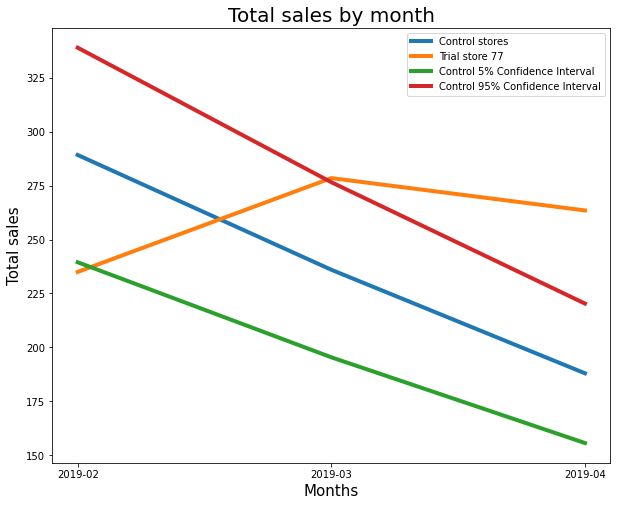

In [1889]:
#plot

fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(x = 'months', y = 'scaledSales_c' , data = control_trial_sales, lw=4)
sns.lineplot(x = 'months', y = 'trial_sales', data = control_trial_sales, lw=4)
sns.lineplot(x = 'months', y = 'Control 5% Confidence Interval', data = control_trial_sales,lw=4)
sns.lineplot(x = 'months', y = 'Control 95% Confidence Interval', data = control_trial_sales,lw=4)

# Set title and labels for axes
plt.xlabel("Months", fontsize=15)
plt.ylabel("Total sales", fontsize=15)
plt.title('Total sales by month', fontsize=20)
ax.legend(['Control stores', 'Trial store 77', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval'])
plt.show()

The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

Let’s have a look at assessing this for number of customers as well.

In [1890]:
#Calculate a scaling factor to apply to the control store

trial_sum1=preTrialMeasures[(preTrialMeasures['STORE_NBR']==77)|(preTrialMeasures['STORE_NBR']==86)|(preTrialMeasures['STORE_NBR']==88)]['nCustomers'].sum()
control_sum1=preTrialMeasures[(preTrialMeasures['STORE_NBR']==233)|(preTrialMeasures['STORE_NBR']==155)|(preTrialMeasures['STORE_NBR']==178)]['nCustomers'].sum()
scaling_factorCust=trial_sum1/control_sum1
scaling_factorCust

1.0906976744186045

In [1891]:
# We only want control store i.e. store 233

measureOverTimeCust=measureOverTime
scaledControlCust= measureOverTimeCust[measureOverTimeCust['STORE_NBR'] == 233]
scaledControlCust['scaledCust_c']=scaledControlCust['nCustomers']*scaling_factorCust
scaledControlCust=scaledControlCust[['months','STORE_NBR','scaledCust_c']]
scaledControlCust.head()

,months,STORE_NBR,scaledCust_c
2699,2018-07,233,55.625581
2700,2018-08,233,52.353488
2701,2018-09,233,45.809302
2702,2018-10,233,38.174419
2703,2018-11,233,43.627907


Now that we have comparable figures for number of customers for the control store, we can calculate the percentage difference between the scaled number of customers and the trial store’s number of customers during the trial period.

In [1892]:
#### Calculate the percentage difference between scaled control sales and trial sales

trialCust=measureOverTimeCust[measureOverTimeCust['STORE_NBR'] == 77]
trialCust=trialCust[['months', 'STORE_NBR','nCustomers']]
trialCust=trialCust.rename(columns={'nCustomers':'trial_ncust'})
trialCust.head()

,months,STORE_NBR,trial_ncust
880,2018-07,77,51
881,2018-08,77,47
882,2018-09,77,42
883,2018-10,77,37
884,2018-11,77,41


In [1893]:
# Calculate percentage difference

percentageDiff_nCust=pd.merge(scaledControlCust,trialCust, on='months')
percentageDiff_nCust['percentageDiff'] = abs(percentageDiff_nCust['scaledCust_c'] - percentageDiff_nCust['trial_ncust']) / percentageDiff_nCust['scaledCust_c']
percentageDiff_nCust

,months,STORE_NBR_x,scaledCust_c,STORE_NBR_y,trial_ncust,percentageDiff
0,2018-07,233,55.625581,77,51,0.083156
1,2018-08,233,52.353488,77,47,0.102257
2,2018-09,233,45.809302,77,42,0.083156
3,2018-10,233,38.174419,77,37,0.030765
4,2018-11,233,43.627907,77,41,0.060235
5,2018-12,233,51.262791,77,46,0.102663
6,2019-01,233,38.174419,77,35,0.083156
7,2019-02,233,49.081395,77,45,0.083156
8,2019-03,233,43.627907,77,50,0.146055
9,2019-04,233,32.720930,77,47,0.436389


In [1894]:
#Let’s see if the difference is significant!
#As our null hypothesis is that the trial period is the same as the pre‐trial period, 
#let's take the standard deviation based on the scaled percentage difference in the pre‐trial period

In [1895]:
from statistics import stdev

stdDev = stdev(percentageDiff_nCust[percentageDiff_nCust['months']< '2019-02']['percentageDiff'])
stdDev

0.025242595761876922

In [1896]:
#note that there are 7 months in the pre‐trial period #
#Hence 7 ‐ 1 = 6 degrees of freedom

degreesOfFreedom=6

In [1897]:
#### We will test with a null hypothesis of there being 0 difference between trial and control stores

percentageDiff_nCust['tValue']=(percentageDiff_nCust['percentageDiff']-0)/stdDev
control_trial_nCust=percentageDiff_nCust[(percentageDiff_nCust['months']>='2019-02')& (percentageDiff_nCust['months']<='2019-04')]
control_trial_nCust

,months,STORE_NBR_x,scaledCust_c,STORE_NBR_y,trial_ncust,percentageDiff,tValue
7,2019-02,233,49.081395,77,45,0.083156,3.294259
8,2019-03,233,43.627907,77,50,0.146055,5.786070
9,2019-04,233,32.720930,77,47,0.436389,17.287821


In [1898]:
# Find the 95th percentile of the t distribution with the appropriate 
# degrees of freedom to compare against

t.isf(0.05, degreesOfFreedom)

1.9431802803927818

We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for Feburary and April - i.e. the increase in the number of customers in the trial store in Feburary and April is statistically greater than in the control store. Let’s create a more visual version of this by plotting the number of customers of the control store, the number of customers of the trial stores and the 95th percentile value of number of customers of the control store.

In [1899]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval

control_trial_nCust['Control 5% Confidence Interval'] = control_trial_nCust['scaledCust_c'] * (1 - stdDev*2)
control_trial_nCust['Control 95% Confidence Interval'] = control_trial_nCust['scaledCust_c'] * (1 + stdDev*2)
control_trial_nCust

,months,STORE_NBR_x,scaledCust_c,STORE_NBR_y,trial_ncust,percentageDiff,tValue,Control 5% Confidence Interval,Control 95% Confidence Interval
7,2019-02,233,49.081395,77,45,0.083156,3.294259,46.603512,51.559279
8,2019-03,233,43.627907,77,50,0.146055,5.786070,41.425344,45.830470
9,2019-04,233,32.720930,77,47,0.436389,17.287821,31.069008,34.372853


In [1900]:
control_trial_nCust=control_trial_nCust[['months','scaledCust_c','Control 5% Confidence Interval', 'Control 95% Confidence Interval','trial_ncust']]
control_trial_nCust['months']=control_trial_nCust['months'].astype(str)
control_trial_nCust

,months,scaledCust_c,Control 5% Confidence Interval,Control 95% Confidence Interval,trial_ncust
7,2019-02,49.081395,46.603512,51.559279,45
8,2019-03,43.627907,41.425344,45.830470,50
9,2019-04,32.720930,31.069008,34.372853,47


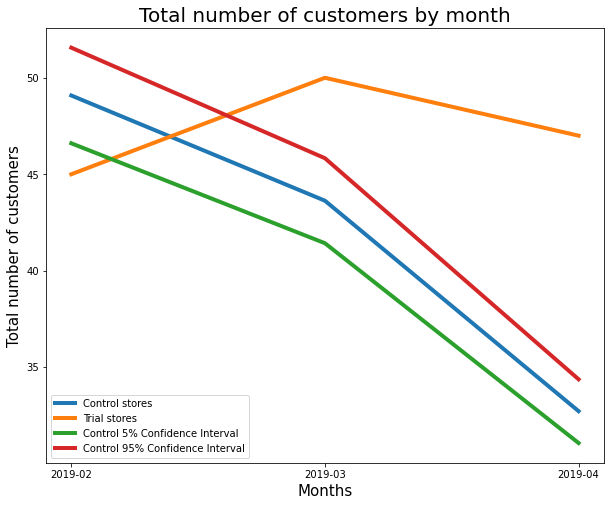

In [1901]:
fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(x = 'months', y = 'scaledCust_c' , data = control_trial_nCust, lw=4)
sns.lineplot(x = 'months', y = 'trial_ncust', data = control_trial_nCust, lw=4)
sns.lineplot(x = 'months', y = 'Control 5% Confidence Interval', data = control_trial_nCust,lw=4)
sns.lineplot(x = 'months', y = 'Control 95% Confidence Interval', data = control_trial_nCust,lw=4)

# Set title and labels for axes
plt.xlabel("Months", fontsize=15)
plt.ylabel("Total number of customers", fontsize=15)
plt.title('Total number of customers by month', fontsize=20)
ax.legend(['Control stores', 'Trial stores', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval'])
plt.show()

Let’s repeat finding the control store and assessing the impact of the trial for each of the other two trial stores.

#### Trial store 86

In [1902]:
#Calculate a scaling factor to apply to the control store

trial_sum=preTrialMeasures[(preTrialMeasures['STORE_NBR']==77)|(preTrialMeasures['STORE_NBR']==86)|(preTrialMeasures['STORE_NBR']==88)]['tot_sales'].sum()
control_sum=preTrialMeasures[(preTrialMeasures['STORE_NBR']==233)|(preTrialMeasures['STORE_NBR']==155)|(preTrialMeasures['STORE_NBR']==178)]['tot_sales'].sum()
scaling_factor=trial_sum/control_sum
scaling_factor

1.1853131675049957

In [1903]:
# We only want control store i.e. store 155

measureOverTimeSales=measureOverTime
scaledControlSales= measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == 155]
scaledControlSales['scaledSales_c']=scaledControlSales['tot_sales']*scaling_factor
scaledControlSales=scaledControlSales[['months','STORE_NBR','scaledSales_c']]
scaledControlSales.head()

,months,STORE_NBR,scaledSales_c
1793,2018-07,155,1095.940555
1794,2018-08,155,927.744616
1795,2018-09,155,1202.381677
1796,2018-10,155,1142.404831
1797,2018-11,155,1065.359475


In [1904]:
# Now that we have comparable sales figures for the control store, we can calculate the percentage 
#difference between the scaled control sales and the trial store’s sales during the trial period.
#### Calculate the percentage difference between scaled control sales and trial sales

trialSales=measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == 86]
trialSales=trialSales[['months', 'STORE_NBR','tot_sales']]
trialSales=trialSales.rename(columns={'tot_sales':'trial_sales'})
trialSales.head()

,months,STORE_NBR,trial_sales
977,2018-07,86,892.20
978,2018-08,86,764.05
979,2018-09,86,914.60
980,2018-10,86,948.40
981,2018-11,86,918.00


In [1905]:
# Calculate percentage difference

percentageDiff=pd.merge(scaledControlSales,trialSales, on='months')
percentageDiff['percentageDiff'] = abs(percentageDiff['scaledSales_c'] - percentageDiff['trial_sales']) / percentageDiff['scaledSales_c']
percentageDiff

,months,STORE_NBR_x,scaledSales_c,STORE_NBR_y,trial_sales,percentageDiff
0,2018-07,155,1095.940555,86,892.20,0.185905
1,2018-08,155,927.744616,86,764.05,0.176444
2,2018-09,155,1202.381677,86,914.60,0.239343
3,2018-10,155,1142.404831,86,948.40,0.169821
4,2018-11,155,1065.359475,86,918.00,0.138319
5,2018-12,155,1007.279130,86,841.20,0.164879
6,2019-01,155,1036.674896,86,841.40,0.188367
7,2019-02,155,1056.351095,86,913.20,0.135515
8,2019-03,155,953.465912,86,1026.80,0.076913
9,2019-04,155,1001.115501,86,848.20,0.152745


In [1906]:
#Let’s see if the difference is significant!
#As our null hypothesis is that the trial period is the same as the pre‐trial period, 
#let's take the standard deviation based on the scaled percentage difference in the pre‐trial period


from statistics import stdev

stdDev = stdev(percentageDiff[percentageDiff['months']< '2019-02']['percentageDiff'])
stdDev

0.030841826610790754

In [1907]:
#### note that there are 7 months in the pre‐trial period #### hence 7 ‐ 1 = 6 degrees of freedom

degreesOfFreedom=6

#### We will test with a null hypothesis of there being 0 difference between trial and control stores

percentageDiff['tValue']=(percentageDiff['percentageDiff']-0)/stdDev
control_trial_sales=percentageDiff[(percentageDiff['months']>='2019-02')& (percentageDiff['months']<='2019-04')]
control_trial_sales

,months,STORE_NBR_x,scaledSales_c,STORE_NBR_y,trial_sales,percentageDiff,tValue
7,2019-02,155,1056.351095,86,913.2,0.135515,4.393861
8,2019-03,155,953.465912,86,1026.8,0.076913,2.493794
9,2019-04,155,1001.115501,86,848.2,0.152745,4.952531


In [1908]:
#Find the 95th percentile of the t distribution with the appropriate degrees of freedom to compare against

t.isf(0.05, degreesOfFreedom)

1.9431802803927818

In [1909]:
#We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for 
#Feburary and April - i.e. the increase in sales in the trial store in Feburary and April is statistically greater 
#than in the control store. Let’s create a more visual version of this by plotting the sales of the control 
#store, the sales of the trial stores and the 95th percentile value of sales of the control store.

# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval

control_trial_sales['Control 5% Confidence Interval'] = control_trial_sales['scaledSales_c'] * (1 - stdDev*2)
control_trial_sales['Control 95% Confidence Interval'] = control_trial_sales['scaledSales_c'] * (1 + stdDev*2)
control_trial_sales

,months,STORE_NBR_x,scaledSales_c,STORE_NBR_y,trial_sales,percentageDiff,tValue,Control 5% Confidence Interval,Control 95% Confidence Interval
7,2019-02,155,1056.351095,86,913.2,0.135515,4.393861,991.191500,1121.510689
8,2019-03,155,953.465912,86,1026.8,0.076913,2.493794,894.652651,1012.279173
9,2019-04,155,1001.115501,86,848.2,0.152745,4.952531,939.363040,1062.867963


In [1910]:
control_trial_sales=control_trial_sales[['months','scaledSales_c','Control 5% Confidence Interval', 'Control 95% Confidence Interval','trial_sales']]
control_trial_sales

control_trial_sales['months']=control_trial_sales['months'].astype(str)

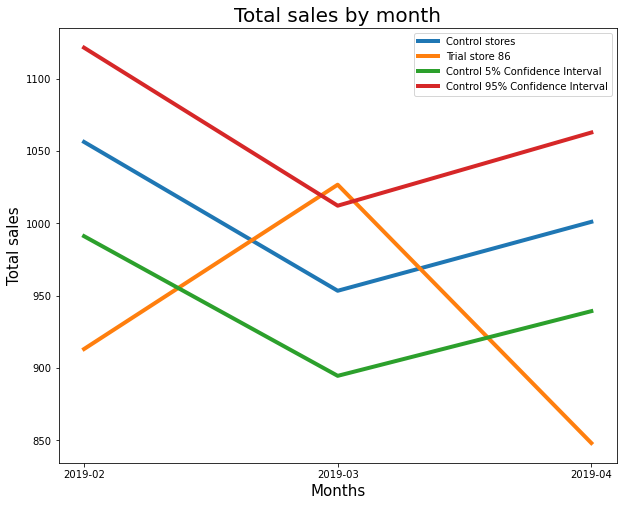

In [1911]:
fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(x = 'months', y = 'scaledSales_c' , data = control_trial_sales, lw=4)
sns.lineplot(x = 'months', y = 'trial_sales', data = control_trial_sales, lw=4)
sns.lineplot(x = 'months', y = 'Control 5% Confidence Interval', data = control_trial_sales,lw=4)
sns.lineplot(x = 'months', y = 'Control 95% Confidence Interval', data = control_trial_sales,lw=4)

# Set title and labels for axes
plt.xlabel("Months", fontsize=15)
plt.ylabel("Total sales", fontsize=15)
plt.title('Total sales by month', fontsize=20)
ax.legend(['Control stores', 'Trial store 86', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval'])
plt.show()

The results show that the trial in store 86 is not significantly different to its control store in the trial period as the trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the three trial months.

Let’s have a look at assessing this for number of customers as well.

In [1912]:
trial_sum1=preTrialMeasures[(preTrialMeasures['STORE_NBR']==77)|(preTrialMeasures['STORE_NBR']==86)|(preTrialMeasures['STORE_NBR']==88)]['nCustomers'].sum()
control_sum1=preTrialMeasures[(preTrialMeasures['STORE_NBR']==233)|(preTrialMeasures['STORE_NBR']==155)|(preTrialMeasures['STORE_NBR']==178)]['nCustomers'].sum()
scaling_factorCust=trial_sum1/control_sum1
scaling_factorCust

1.0906976744186045

In [1913]:
# We only want control store i.e. store 155

measureOverTimeCust=measureOverTime
scaledControlCust= measureOverTimeCust[measureOverTimeCust['STORE_NBR'] == 155]
scaledControlCust['scaledCust_c']=scaledControlCust['nCustomers']*scaling_factorCust
scaledControlCust=scaledControlCust[['months','STORE_NBR','scaledCust_c']]
scaledControlCust.head()

,months,STORE_NBR,scaledCust_c
1793,2018-07,155,110.160465
1794,2018-08,155,99.253488
1795,2018-09,155,112.341860
1796,2018-10,155,117.795349
1797,2018-11,155,110.160465


In [1914]:
# Now that we have comparable figures for number of customers for the control store, we can calculate the percentage difference between the scaled number of customers and the trial store’s number of customers during the trial period.

#### Calculate the percentage difference between scaled control sales and trial sales

trialCust=measureOverTimeCust[measureOverTimeCust['STORE_NBR'] == 86]
trialCust=trialCust[['months', 'STORE_NBR','nCustomers']]
trialCust=trialCust.rename(columns={'nCustomers':'trial_ncust'})
trialCust.head()

,months,STORE_NBR,trial_ncust
977,2018-07,86,99
978,2018-08,86,94
979,2018-09,86,103
980,2018-10,86,109
981,2018-11,86,100


In [1915]:
# Calculate percentage difference

percentageDiff_nCust=pd.merge(scaledControlCust,trialCust, on='months')
percentageDiff_nCust['percentageDiff'] = abs(percentageDiff_nCust['scaledCust_c'] - percentageDiff_nCust['trial_ncust']) / percentageDiff_nCust['scaledCust_c']
percentageDiff_nCust

,months,STORE_NBR_x,scaledCust_c,STORE_NBR_y,trial_ncust,percentageDiff
0,2018-07,155,110.160465,86,99,0.101311
1,2018-08,155,99.253488,86,94,0.052930
2,2018-09,155,112.341860,86,103,0.083156
3,2018-10,155,117.795349,86,109,0.074666
4,2018-11,155,110.160465,86,100,0.092233
5,2018-12,155,105.797674,86,98,0.073704
6,2019-01,155,104.706977,86,94,0.102257
7,2019-02,155,103.616279,86,107,0.032656
8,2019-03,155,102.525581,86,115,0.121671
9,2019-04,155,107.979070,86,105,0.027589


In [1916]:
#Let’s see if the difference is significant!
#As our null hypothesis is that the trial period is the same as the pre‐trial period, 
#let's take the standard deviation based on the scaled percentage difference in the pre‐trial period

from statistics import stdev

stdDev = stdev(percentageDiff_nCust[percentageDiff_nCust['months']< '2019-02']['percentageDiff'])
stdDev

0.017565986277934188

In [1917]:
#### note that there are 7 months in the pre‐trial period #### hence 7 ‐ 1 = 6 degrees of freedom

degreesOfFreedom=6

#### We will test with a null hypothesis of there being 0 difference between trial and control stores

percentageDiff_nCust['tValue']=(percentageDiff_nCust['percentageDiff']-0)/stdDev
control_trial_nCust=percentageDiff_nCust[(percentageDiff_nCust['months']>='2019-02')& (percentageDiff_nCust['months']<='2019-04')]
control_trial_nCust

,months,STORE_NBR_x,scaledCust_c,STORE_NBR_y,trial_ncust,percentageDiff,tValue
7,2019-02,155,103.616279,86,107,0.032656,1.859063
8,2019-03,155,102.525581,86,115,0.121671,6.926527
9,2019-04,155,107.979070,86,105,0.027589,1.570611


In [1918]:
#### Find the 95th percentile of the t distribution with the appropriate #### degrees of freedom 
#to compare against

t.isf(0.05, degreesOfFreedom)

1.9431802803927818

We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for Feburary and April - i.e. the increase in the number of customers in the trial store in Feburary and April is statistically greater than in the control store. Let’s create a more visual version of this by plotting the number of customers of the control store, the number of customers of the trial stores and the 95th percentile value of number of customers of the control store.

In [1919]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval

control_trial_nCust['Control 5% Confidence Interval'] = control_trial_nCust['scaledCust_c'] * (1 - stdDev*2)
control_trial_nCust['Control 95% Confidence Interval'] = control_trial_nCust['scaledCust_c'] * (1 + stdDev*2)
control_trial_nCust

,months,STORE_NBR_x,scaledCust_c,STORE_NBR_y,trial_ncust,percentageDiff,tValue,Control 5% Confidence Interval,Control 95% Confidence Interval
7,2019-02,155,103.616279,86,107,0.032656,1.859063,99.976035,107.256523
8,2019-03,155,102.525581,86,115,0.121671,6.926527,98.923655,106.127507
9,2019-04,155,107.979070,86,105,0.027589,1.570611,104.185552,111.772587


In [1920]:
control_trial_nCust=control_trial_nCust[['months','scaledCust_c','Control 5% Confidence Interval', 'Control 95% Confidence Interval','trial_ncust']]
control_trial_nCust['months']=control_trial_nCust['months'].astype(str)
control_trial_nCust

,months,scaledCust_c,Control 5% Confidence Interval,Control 95% Confidence Interval,trial_ncust
7,2019-02,103.616279,99.976035,107.256523,107
8,2019-03,102.525581,98.923655,106.127507,115
9,2019-04,107.979070,104.185552,111.772587,105


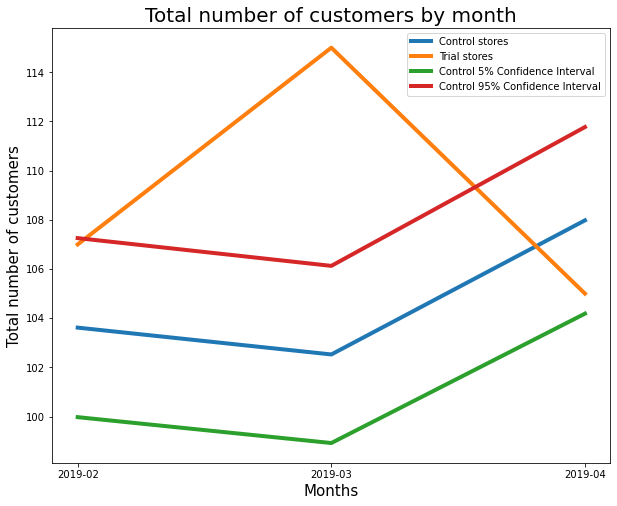

In [1921]:
fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(x = 'months', y = 'scaledCust_c' , data = control_trial_nCust, lw=4)
sns.lineplot(x = 'months', y = 'trial_ncust', data = control_trial_nCust, lw=4)
sns.lineplot(x = 'months', y = 'Control 5% Confidence Interval', data = control_trial_nCust,lw=4)
sns.lineplot(x = 'months', y = 'Control 95% Confidence Interval', data = control_trial_nCust,lw=4)

# Set title and labels for axes
plt.xlabel("Months", fontsize=15)
plt.ylabel("Total number of customers", fontsize=15)
plt.title('Total number of customers by month', fontsize=20)
ax.legend(['Control stores', 'Trial stores', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval'])
plt.show()

It looks like the number of customers is significantly higher in all of the three months. This seems to suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but as we saw, sales were not significantly higher. We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results.

#### Trial Store 88

In [1922]:
#Calculate a scaling factor to apply to the control store

trial_sum=preTrialMeasures[(preTrialMeasures['STORE_NBR']==77)|(preTrialMeasures['STORE_NBR']==86)|(preTrialMeasures['STORE_NBR']==88)]['tot_sales'].sum()
control_sum=preTrialMeasures[(preTrialMeasures['STORE_NBR']==233)|(preTrialMeasures['STORE_NBR']==155)|(preTrialMeasures['STORE_NBR']==178)]['tot_sales'].sum()
scaling_factor=trial_sum/control_sum
scaling_factor

1.1853131675049957

In [1923]:
# We only want control store i.e. store 155

measureOverTimeSales=measureOverTime
scaledControlSales= measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == 178]
scaledControlSales['scaledSales_c']=scaledControlSales['tot_sales']*scaling_factor
scaledControlSales=scaledControlSales[['months','STORE_NBR','scaledSales_c']]
scaledControlSales.head()

,months,STORE_NBR,scaledSales_c
2069,2018-07,178,1128.418135
2070,2018-08,178,1085.154205
2071,2018-09,178,1131.262887
2072,2018-10,178,1140.982455
2073,2018-11,178,1156.391526


In [1924]:
# Now that we have comparable sales figures for the control store, we can calculate the percentage 
#difference between the scaled control sales and the trial store’s sales during the trial period.

#Calculate the percentage difference between scaled control sales and trial sales

trialSales=measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == 88]
trialSales=trialSales[['months', 'STORE_NBR','tot_sales']]
trialSales=trialSales.rename(columns={'tot_sales':'trial_sales'})
trialSales.head()

,months,STORE_NBR,trial_sales
1001,2018-07,88,1310.0
1002,2018-08,88,1323.8
1003,2018-09,88,1423.0
1004,2018-10,88,1352.4
1005,2018-11,88,1382.8


In [1925]:
# Calculate percentage difference

percentageDiff=pd.merge(scaledControlSales,trialSales, on='months')
percentageDiff['percentageDiff'] = abs(percentageDiff['scaledSales_c'] - percentageDiff['trial_sales']) / percentageDiff['scaledSales_c']
percentageDiff

,months,STORE_NBR_x,scaledSales_c,STORE_NBR_y,trial_sales,percentageDiff
0,2018-07,178,1128.418135,88,1310.00,0.160917
1,2018-08,178,1085.154205,88,1323.80,0.219919
2,2018-09,178,1131.262887,88,1423.00,0.257886
3,2018-10,178,1140.982455,88,1352.40,0.185294
4,2018-11,178,1156.391526,88,1382.80,0.195789
5,2018-12,178,1122.728632,88,1325.20,0.180339
6,2019-01,178,992.344184,88,1266.40,0.276170
7,2019-02,178,1290.568977,88,1370.20,0.061702
8,2019-03,178,1183.890792,88,1477.20,0.247750
9,2019-04,178,1256.194895,88,1439.40,0.145841


In [1926]:
#Let’s see if the difference is significant!
#As our null hypothesis is that the trial period is the same as the pre‐trial period, 
#let's take the standard deviation based on the scaled percentage difference in the pre‐trial period

from statistics import stdev

stdDev = stdev(percentageDiff[percentageDiff['months']< '2019-02']['percentageDiff'])
stdDev

0.042554890299879924

In [1927]:
#### note that there are 7 months in the pre‐trial period #### hence 7 ‐ 1 = 6 degrees of freedom

degreesOfFreedom=6

#### We will test with a null hypothesis of there being 0 difference between trial and control stores

percentageDiff['tValue']=(percentageDiff['percentageDiff']-0)/stdDev
control_trial_sales=percentageDiff[(percentageDiff['months']>='2019-02')& (percentageDiff['months']<='2019-04')]
control_trial_sales

,months,STORE_NBR_x,scaledSales_c,STORE_NBR_y,trial_sales,percentageDiff,tValue
7,2019-02,178,1290.568977,88,1370.2,0.061702,1.449945
8,2019-03,178,1183.890792,88,1477.2,0.247750,5.821898
9,2019-04,178,1256.194895,88,1439.4,0.145841,3.427134


In [1928]:
#Find the 95th percentile of the t distribution with the appropriate degrees of freedom to compare against

t.isf(0.05, degreesOfFreedom)

#We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for 
#Feburary and April - i.e. the increase in sales in the trial store in Feburary and April is statistically greater 
#than in the control store. Let’s create a more visual version of this by plotting the sales of the control 
#store, the sales of the trial stores and the 95th percentile value of sales of the control store.

1.9431802803927818

In [1929]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval

control_trial_sales['Control 5% Confidence Interval'] = control_trial_sales['scaledSales_c'] * (1 - stdDev*2)
control_trial_sales['Control 95% Confidence Interval'] = control_trial_sales['scaledSales_c'] * (1 + stdDev*2)
control_trial_sales

,months,STORE_NBR_x,scaledSales_c,STORE_NBR_y,trial_sales,percentageDiff,tValue,Control 5% Confidence Interval,Control 95% Confidence Interval
7,2019-02,178,1290.568977,88,1370.2,0.061702,1.449945,1180.728934,1400.409019
8,2019-03,178,1183.890792,88,1477.2,0.247750,5.821898,1083.130106,1284.651477
9,2019-04,178,1256.194895,88,1439.4,0.145841,3.427134,1149.280423,1363.109367


In [1930]:
control_trial_sales=control_trial_sales[['months','scaledSales_c','Control 5% Confidence Interval', 'Control 95% Confidence Interval','trial_sales']]
control_trial_sales

control_trial_sales['months']=control_trial_sales['months'].astype(str)

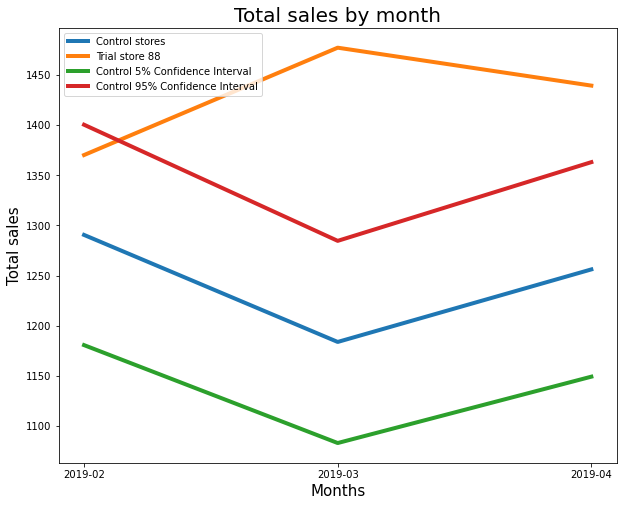

In [1931]:
fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(x = 'months', y = 'scaledSales_c' , data = control_trial_sales, lw=4)
sns.lineplot(x = 'months', y = 'trial_sales', data = control_trial_sales, lw=4)
sns.lineplot(x = 'months', y = 'Control 5% Confidence Interval', data = control_trial_sales,lw=4)
sns.lineplot(x = 'months', y = 'Control 95% Confidence Interval', data = control_trial_sales,lw=4)

# Set title and labels for axes
plt.xlabel("Months", fontsize=15)
plt.ylabel("Total sales", fontsize=15)
plt.title('Total sales by month', fontsize=20)
ax.legend(['Control stores', 'Trial store 88', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval'])
plt.show()

The results show that the trial in store 88 is significantly different to its control store in the trial period as the trial store performance lies outside of the 5% to 95% confidence interval of the control store in two of the three trial months.

Let’s have a look at assessing this for number of customers as well.

In [1932]:
#Calculate a scaling factor to apply to the control store

trial_sum1=preTrialMeasures[(preTrialMeasures['STORE_NBR']==77)|(preTrialMeasures['STORE_NBR']==86)|(preTrialMeasures['STORE_NBR']==88)]['nCustomers'].sum()
control_sum1=preTrialMeasures[(preTrialMeasures['STORE_NBR']==233)|(preTrialMeasures['STORE_NBR']==155)|(preTrialMeasures['STORE_NBR']==178)]['nCustomers'].sum()
scaling_factorCust=trial_sum1/control_sum1
scaling_factorCust

1.0906976744186045

In [1933]:
# We only want control store i.e. store 233

measureOverTimeCust=measureOverTime
scaledControlCust= measureOverTimeCust[measureOverTimeCust['STORE_NBR'] == 178]
scaledControlCust['scaledCust_c']=scaledControlCust['nCustomers']*scaling_factorCust
scaledControlCust=scaledControlCust[['months','STORE_NBR','scaledCust_c']]
scaledControlCust.head()

,months,STORE_NBR,scaledCust_c
2069,2018-07,178,116.704651
2070,2018-08,178,117.795349
2071,2018-09,178,110.160465
2072,2018-10,178,111.251163
2073,2018-11,178,121.067442


In [1934]:
# Now that we have comparable figures for number of customers for the control store, we can calculate the percentage difference between the scaled number of customers and the trial store’s number of customers during the trial period.

#### Calculate the percentage difference between scaled control sales and trial sales

trialCust=measureOverTimeCust[measureOverTimeCust['STORE_NBR'] == 88]
trialCust=trialCust[['months', 'STORE_NBR','nCustomers']]
trialCust=trialCust.rename(columns={'nCustomers':'trial_ncust'})
trialCust.head()

,months,STORE_NBR,trial_ncust
1001,2018-07,88,129
1002,2018-08,88,131
1003,2018-09,88,124
1004,2018-10,88,123
1005,2018-11,88,130


In [1935]:
# Calculate percentage difference

percentageDiff_nCust=pd.merge(scaledControlCust,trialCust, on='months')
percentageDiff_nCust['percentageDiff'] = abs(percentageDiff_nCust['scaledCust_c'] - percentageDiff_nCust['trial_ncust']) / percentageDiff_nCust['scaledCust_c']
percentageDiff_nCust

,months,STORE_NBR_x,scaledCust_c,STORE_NBR_y,trial_ncust,percentageDiff
0,2018-07,178,116.704651,88,129,0.105354
1,2018-08,178,117.795349,88,131,0.112098
2,2018-09,178,110.160465,88,124,0.125631
3,2018-10,178,111.251163,88,123,0.105606
4,2018-11,178,121.067442,88,130,0.073782
5,2018-12,178,110.160465,88,126,0.143786
6,2019-01,178,103.616279,88,117,0.129166
7,2019-02,178,116.704651,88,124,0.062511
8,2019-03,178,124.339535,88,134,0.077694
9,2019-04,178,127.611628,88,128,0.003043


In [1936]:
#Let’s see if the difference is significant!
#As our null hypothesis is that the trial period is the same as the pre‐trial period, 
#let's take the standard deviation based on the scaled percentage difference in the pre‐trial period

from statistics import stdev

stdDev = stdev(percentageDiff_nCust[percentageDiff_nCust['months']< '2019-02']['percentageDiff'])
stdDev

0.02242719499586535

In [1937]:
#### note that there are 7 months in the pre‐trial period #### hence 7 ‐ 1 = 6 degrees of freedom

degreesOfFreedom=6


#### We will test with a null hypothesis of there being 0 difference between trial and control stores

percentageDiff_nCust['tValue']=(percentageDiff_nCust['percentageDiff']-0)/stdDev
control_trial_nCust=percentageDiff_nCust[(percentageDiff_nCust['months']>='2019-02')& (percentageDiff_nCust['months']<='2019-04')]
control_trial_nCust

,months,STORE_NBR_x,scaledCust_c,STORE_NBR_y,trial_ncust,percentageDiff,tValue
7,2019-02,178,116.704651,88,124,0.062511,2.787295
8,2019-03,178,124.339535,88,134,0.077694,3.464287
9,2019-04,178,127.611628,88,128,0.003043,0.135701


In [1938]:
#### Find the 95th percentile of the t distribution with the appropriate #### degrees of freedom 
#to compare against

t.isf(0.05, degreesOfFreedom)

#We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for 
#Feburary and April - i.e. the increase in the number of customers in the trial store in Feburary and April is statistically greater 
#than in the control store. Let’s create a more visual version of this by plotting the number of customers of the control 
#store, the number of customers of the trial stores and the 95th percentile value of number of customers of the control store.

1.9431802803927818

In [1939]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval

control_trial_nCust['Control 5% Confidence Interval'] = control_trial_nCust['scaledCust_c'] * (1 - stdDev*2)
control_trial_nCust['Control 95% Confidence Interval'] = control_trial_nCust['scaledCust_c'] * (1 + stdDev*2)
control_trial_nCust

,months,STORE_NBR_x,scaledCust_c,STORE_NBR_y,trial_ncust,percentageDiff,tValue,Control 5% Confidence Interval,Control 95% Confidence Interval
7,2019-02,178,116.704651,88,124,0.062511,2.787295,111.469935,121.939367
8,2019-03,178,124.339535,88,134,0.077694,3.464287,118.762361,129.916709
9,2019-04,178,127.611628,88,128,0.003043,0.135701,121.887686,133.335570


In [1940]:
control_trial_nCust=control_trial_nCust[['months','scaledCust_c','Control 5% Confidence Interval', 'Control 95% Confidence Interval','trial_ncust']]
control_trial_nCust['months']=control_trial_nCust['months'].astype(str)
control_trial_nCust

,months,scaledCust_c,Control 5% Confidence Interval,Control 95% Confidence Interval,trial_ncust
7,2019-02,116.704651,111.469935,121.939367,124
8,2019-03,124.339535,118.762361,129.916709,134
9,2019-04,127.611628,121.887686,133.335570,128


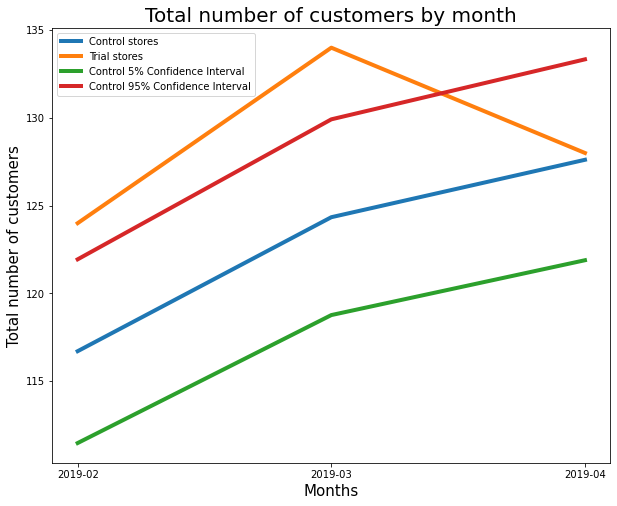

In [1941]:
fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(x = 'months', y = 'scaledCust_c' , data = control_trial_nCust, lw=4)
sns.lineplot(x = 'months', y = 'trial_ncust', data = control_trial_nCust, lw=4)
sns.lineplot(x = 'months', y = 'Control 5% Confidence Interval', data = control_trial_nCust,lw=4)
sns.lineplot(x = 'months', y = 'Control 95% Confidence Interval', data = control_trial_nCust,lw=4)

# Set title and labels for axes
plt.xlabel("Months", fontsize=15)
plt.ylabel("Total number of customers", fontsize=15)
plt.title('Total number of customers by month', fontsize=20)
ax.legend(['Control stores', 'Trial stores', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval'])
plt.show()

Total number of customers in the trial period for the trial store is significantly higher than the control store for two out of three months, which indicates a positive trial effect.

## Conclusion

We’ve found control stores 233, 155 and 178 for trial stores 77, 86 and 88 respectively.

The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales. Now that we have finished our analysis, we can prepare our presentation to the Category Manager.